<center><h1>Munimadugu_Sreenidhi Iyengar_HW2</h1></center>
<br>
<br>

Name: Munimadugu Sreenidhi Iyengar
<br>
Github Username: munimadu
<br>
USC ID: 7710418375

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
# Required libraries are imported
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import neighbors


Get the Cycle Power Plant Data Set

In [2]:
# Load the Combined Cycle Power Plant data
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
# Displaying number of rows and columns in the data and explaining the features
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("Each row represents an observation of the features: Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and the net hourly electrical energy output (PE) of the power plant.")


The dataset contains 9568 rows and 5 columns.
Each row represents an observation of the features: Ambient Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and the net hourly electrical energy output (PE) of the power plant.


#### ii. pairwise scatterplots of all the varianbles

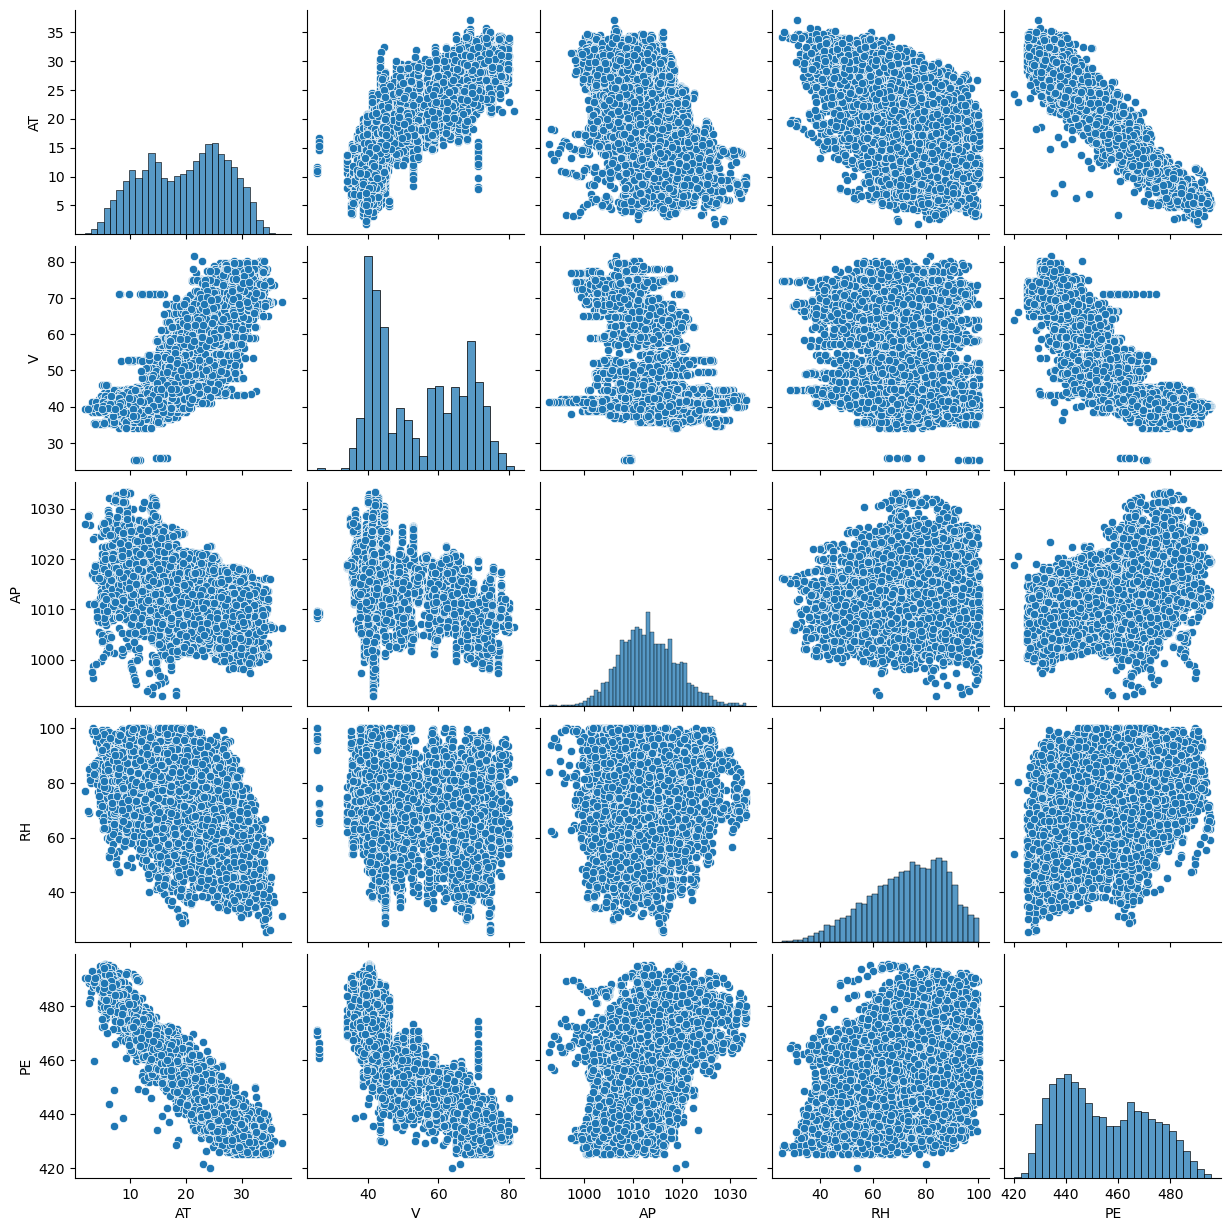

In [4]:

# Making pairwise scatterplots of all variables in the dataset
sns.pairplot(data=df)


In [5]:
print("We observe different relationships between the features and the output PE.", '\n')

print("1. In the scatterplot of Ambient Temperature (AT) versus Power Output (PE), a downward trend is observed implying an inverse relationship - when AT rises, PE tends to fall.")
print("2. Similarly, in the scatterplot of Exhaust Vacuum (V) versus Power Output (PE), a descending trend is evident - as V ascends, PE descends.")
print("3. Contrarily, in the scatterplot of Ambient Pressure (AP) versus Power Output (PE), we notice an upward trend indicating a direct relationship - PE increases with an increase in AP.")
print("4. Lastly, in the scatterplot of Relative Humidity (RH) versus Power Output (PE), an upward trend is discernible - as RH values increase, PE values also increase.")

We observe different relationships between the features and the output PE. 

1. In the scatterplot of Ambient Temperature (AT) versus Power Output (PE), a downward trend is observed implying an inverse relationship - when AT rises, PE tends to fall.
2. Similarly, in the scatterplot of Exhaust Vacuum (V) versus Power Output (PE), a descending trend is evident - as V ascends, PE descends.
3. Contrarily, in the scatterplot of Ambient Pressure (AP) versus Power Output (PE), we notice an upward trend indicating a direct relationship - PE increases with an increase in AP.
4. Lastly, in the scatterplot of Relative Humidity (RH) versus Power Output (PE), an upward trend is discernible - as RH values increase, PE values also increase.


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [6]:
# Computing statistical measures for each variable

summary_stats = df.describe()
summary_table = {
    "mean": summary_stats.loc['mean'].tolist(),
    "median": df.median().tolist(),
    "range": (summary_stats.loc['max'] - summary_stats.loc['min']).tolist(),
    "firstQuartile": summary_stats.loc['25%'].tolist(),
    "thirdQuartile": summary_stats.loc['75%'].tolist(),
    "interQuartileRange": (summary_stats.loc['75%'] - summary_stats.loc['25%']).tolist(),
}

print('Summary Table', '\n')
print(pd.DataFrame.from_dict(summary_table, orient='index', columns=df.columns.tolist()))


Summary Table 

                           AT          V           AP         RH          PE
mean                19.651231  54.305804  1013.259078  73.308978  454.365009
median              20.345000  52.080000  1012.940000  74.975000  451.550000
range               35.300000  56.200000    40.410000  74.600000   75.500000
firstQuartile       13.510000  41.740000  1009.100000  63.327500  439.750000
thirdQuartile       25.720000  66.540000  1017.260000  84.830000  468.430000
interQuartileRange  12.210000  24.800000     8.160000  21.502500   28.680000


### (c) Simple Linear Regression

The linear model equation is: Y = 497.03 + -2.1713 * AT 



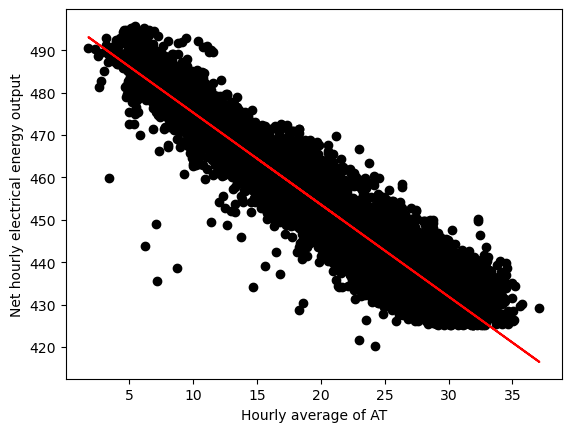

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:26   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

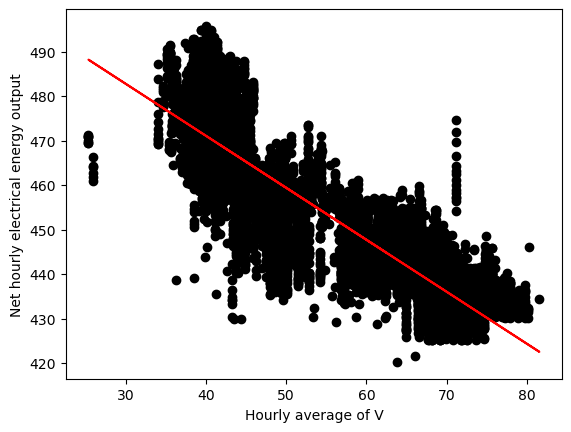

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

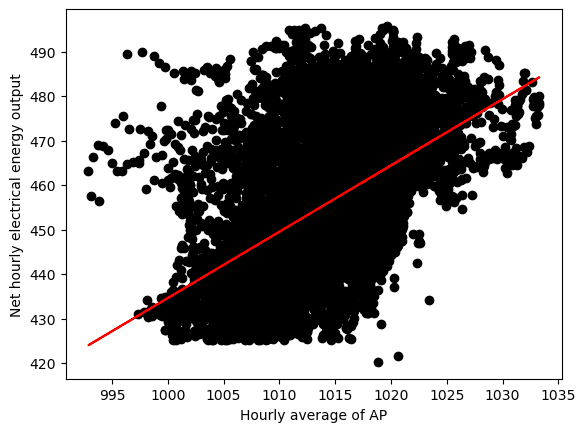

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:27   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

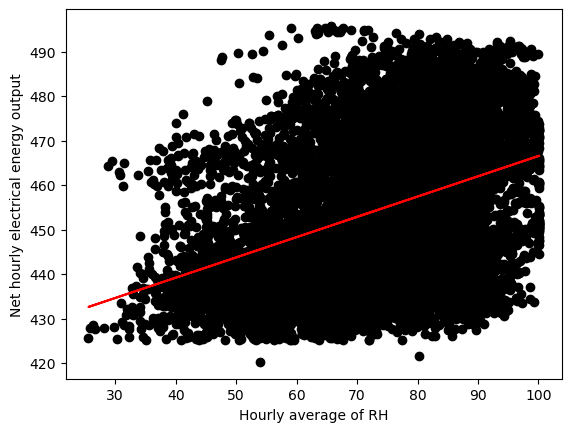

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [7]:
"""
1(c): For every predictor, create a simple linear regression model for forecasting the response. 
Discuss the outcomes. In which models do we observe a significant correlation between the predictor and the response? 
Generate some plots to validate your statements. Do you notice any outliers in your data 
that you'd like to eliminate for these regression operations?
"""

# Initiate the linear regression procedure
simpleRegCoefficients = {}
featureNames = df.columns.drop('PE')

# Loop over each predictor
for feature in featureNames:
    # Separate response and predictor variables and reshape them
    responseVar = np.array(df['PE']).reshape(-1, 1)
    predictorVar = np.array(df[feature]).reshape(-1,1)

    # Splitting not required as we're using all data for fitting
    predictorVar_train = predictorVar
    predictorVar_test = predictorVar
    responseVar_train = responseVar
    responseVar_test = responseVar

    # Create and fit a linear regression model
    model = LinearRegression()
    model.fit(predictorVar_train, responseVar_train)

    # Print the equation of the model
    print("The linear model equation is: Y = {:.5} + {:.5} * {X} \n".format(model.intercept_[0], model.coef_[0][0], X=feature))

    # Predict the response variable
    responseVar_pred = model.predict(predictorVar_test)

    # Create a scatter plot of the test data and plot the regression line
    plt.scatter(predictorVar_test, responseVar_test, color ='black')
    plt.plot(predictorVar_test, responseVar_pred, color ='red')
    plt.xlabel("Hourly average of "+feature)
    plt.ylabel("Net hourly electrical energy output")
    plt.show()
    
    # Use statsmodels to get a summary of the model
    predictorVarWithConstant = sm.add_constant(predictorVar)
    model_OLS = sm.OLS(responseVar, predictorVarWithConstant)
    model_summary = model_OLS.fit()
    print(model_summary.summary())
    
    # Check for outliers using Cook's distance
    outlier_influence = model_summary.get_influence()
    cooks_dist = outlier_influence.cooks_distance
    outlier_threshold = 4/df.shape[0]
    outlier_count = sum(cooks_val > outlier_threshold for cooks_val in cooks_dist[0])
    print("Number of outliers - ", outlier_count)
    simpleRegCoefficients[feature] = model.coef_[0][0]
    print("-------------------------------------------------------------------------------------")


In [8]:
# Analysis
print("Analytical Summary --")
print("1. The strongest association is witnessed between Ambient Temperature (AT) and Power Output (PE) -- This is evidenced by the highest R-squared value in the linear regression results of AT vs PE. The R-squared value for this model is 0.899, which is the highest among all predictors, meaning the model with AT as the predictor explains 89.9% of the variation in PE.")

print("2. Every predictor has a p-value less than 0.005, hence all features are statistically significant -- In the results for each model, the p-value associated with each predictor (under P>|t|) is indeed less than 0.005, indicating a statistically significant relationship between each predictor and the response variable PE.")



Analytical Summary --
1. The strongest association is witnessed between Ambient Temperature (AT) and Power Output (PE) -- This is evidenced by the highest R-squared value in the linear regression results of AT vs PE. The R-squared value for this model is 0.899, which is the highest among all predictors, meaning the model with AT as the predictor explains 89.9% of the variation in PE.
2. Every predictor has a p-value less than 0.005, hence all features are statistically significant -- In the results for each model, the p-value associated with each predictor (under P>|t|) is indeed less than 0.005, indicating a statistically significant relationship between each predictor and the response variable PE.


### (d) Multiple Regression

In [9]:
"""
1(d) Perform a multivariate linear regression predicting the response using all predictors. 
Describe your results. Which predictors have a statistically significant relationship with 
the response variable where the null hypothesis H0:βj= 0 is rejected?
"""

# Initiate multiple regression analysis
predictor_vars = df.drop(['PE'], axis = 1)

response_var = np.array(df['PE']).reshape(-1,1)
multi_linear_regression_coefficients = {}

train_predictors = predictor_vars
test_predictors = predictor_vars
train_response = response_var
test_response = response_var
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_predictors, train_response)
print("The equation of the multivariate linear model is: Y = {:.5} + {:.5}*(AT) + {:.5}*(V) + {:.5}*(AP) + {:.5}*(RH) \n".format(linear_regression_model.intercept_[0], linear_regression_model.coef_[0][0], linear_regression_model.coef_[0][1], linear_regression_model.coef_[0][2], linear_regression_model.coef_[0][3]))
predicted_response = linear_regression_model.predict(test_predictors)

# Compute the summary statistics for the model
X2_with_constant = sm.add_constant(predictor_vars)
OLS_model = sm.OLS(response_var, X2_with_constant)
model_fit = OLS_model.fit()
print(model_fit.summary())

# Save the coefficients of each predictor
for predictor, index in zip(predictor_vars.columns,range(len(predictor_vars.columns))):
    multi_linear_regression_coefficients[predictor] = linear_regression_model.coef_[0][index]


The equation of the multivariate linear model is: Y = 454.61 + -1.9775*(AT) + -0.23392*(V) + 0.062083*(AP) + -0.15805*(RH) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:27   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [10]:

print("Every predictor in the model has a p-value less than 0.005, indicating that they are all statistically significant, hence we reject the null hypothesis for all.")


Every predictor in the model has a p-value less than 0.005, indicating that they are all statistically significant, hence we reject the null hypothesis for all.


### (e) 1c Compare to 1d

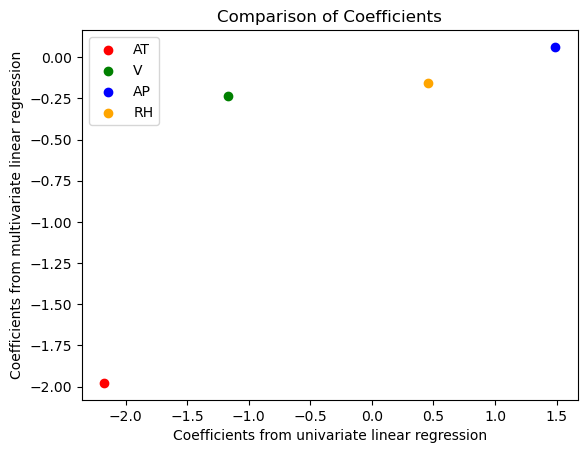

In [11]:
"""1(e) Assess the difference between results from 1c and 1d. 
Construct a plot which displays the single variable regression coefficients from 1c 
on the x-axis, and the multiple regression coefficients from 1d on the y-axis. Each predictor 
should be represented as a single point in the plot. Its coefficient in a univariate linear 
regression model is presented on the x-axis, and its coefficient estimate in the multivariate 
linear regression model is displayed on the y-axis.
"""

# Generating the graph 
# Generating the graph
colors = ['red', 'green', 'blue', 'orange']
for i, variable in enumerate(simpleRegCoefficients.keys()):
    x = simpleRegCoefficients[variable]
    y = multi_linear_regression_coefficients[variable]
    plt.scatter(x, y, color=colors[i], label=variable)

plt.xlabel('Coefficients from univariate linear regression')
plt.ylabel('Coefficients from multivariate linear regression')
plt.title('Comparison of Coefficients')
plt.legend()
plt.show()

### (f) Nonlinear Association

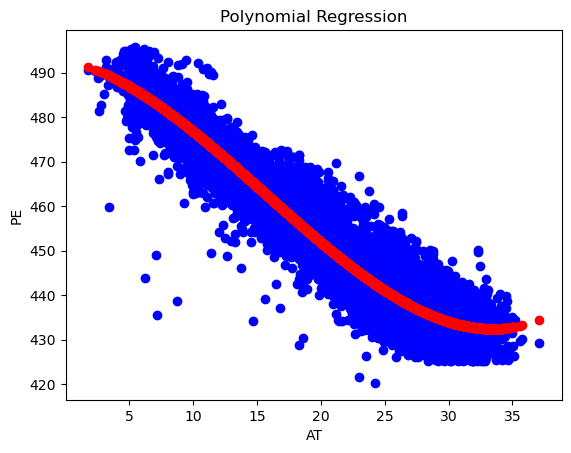

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

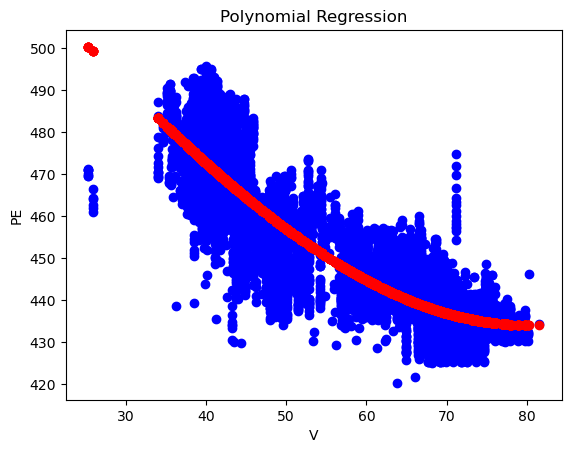

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

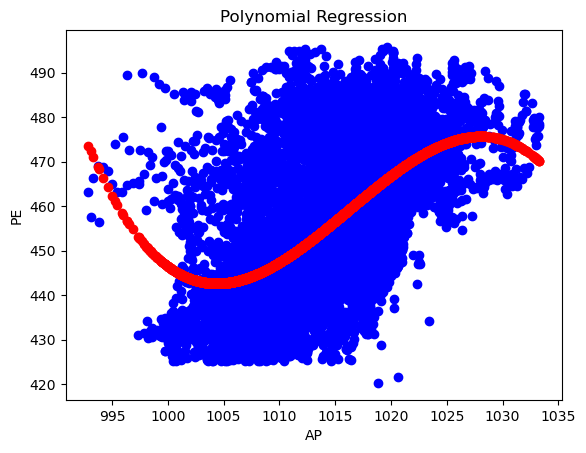

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

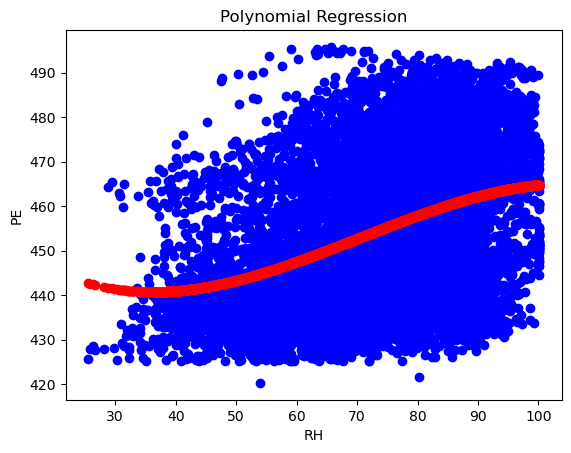

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

In [12]:
"""### 1(f) Are there any signs of non-linear relationships between any of the predictors and the response? To answer this, we'll fit a model of the form 1 for each predictor X"""

# Creating polynomial features
column_names = df.columns.drop('PE')
target_variable = np.array(df['PE']).reshape(-1,1)
for i in column_names:
    poly_transformer = PolynomialFeatures(degree = 3)
    predictor = np.array(df[i]).reshape(-1,1)
    transformed_predictor = poly_transformer.fit_transform(predictor)

    poly_transformer.fit(transformed_predictor, target_variable)
    poly_regression_model = LinearRegression().fit(transformed_predictor, target_variable)
    predicted_values = poly_regression_model.predict(transformed_predictor)
    
    plt.scatter(predictor, target_variable, color = 'blue')
    plt.scatter(predictor, predicted_values, color = 'red')
    plt.title('Polynomial Regression')
    plt.xlabel(i)
    plt.ylabel('PE')
    plt.show()
    
    transformed_predictor = sm.add_constant(transformed_predictor)
    model = sm.OLS(target_variable, transformed_predictor)
    results = model.fit()
    print(results.summary())


In [13]:

print("It's evident that there exist non-linear associations between some predictors and the response. \
      Nevertheless, it's important to treat these findings with caution. \
      The p-values for the quadratic and cubic terms of some predictors, \
      while being statistically significant in certain instances, \
      show fluctuation when varying random states. \
      Even though we observed the cubic term of some predictors having a p-value less than 0.05, \
      indicating some degree of association, \
      we cannot firmly assert a statistically significant non-linear association \
      between these terms and the response. \
      This demonstrates the complexity and potential variability in these relationships. \
      Therefore, further exploration might be needed to conclusively establish the nature of these associations.")

It's evident that there exist non-linear associations between some predictors and the response.       Nevertheless, it's important to treat these findings with caution.       The p-values for the quadratic and cubic terms of some predictors,       while being statistically significant in certain instances,       show fluctuation when varying random states.       Even though we observed the cubic term of some predictors having a p-value less than 0.05,       indicating some degree of association,       we cannot firmly assert a statistically significant non-linear association       between these terms and the response.       This demonstrates the complexity and potential variability in these relationships.       Therefore, further exploration might be needed to conclusively establish the nature of these associations.


### (g) Interactions of Predictors

In [14]:
"""### 1(g) Does the interaction of predictors show any evidence of association with the response? To answer this question, execute a comprehensive linear regression model with all pairwise interaction terms and ascertain if any interaction terms are statistically significant"""

feature_names = df.drop(columns='PE')
target = df['PE']

poly_interaction = PolynomialFeatures(interaction_only=True, include_bias=False)
X_inter = poly_interaction.fit_transform(feature_names)
lin_reg = LinearRegression().fit(X_inter, target)
predicted_y = lin_reg.predict(X_inter)
    
X_inter = sm.add_constant(X_inter)
ols_model = sm.OLS(target, X_inter)
fitted_model = ols_model.fit()
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [15]:

print("Signs of association of interactions of predictors with the response are evident. ")
print(" The predictors - (AT & V), (AT & RH), (V & AP) are statistically significant as their P value is less than 0.05. However, the interaction term (AT & AP) is not statistically significant as its P value is greater than 0.05.") #"

Signs of association of interactions of predictors with the response are evident. 
 The predictors - (AT & V), (AT & RH), (V & AP) are statistically significant as their P value is less than 0.05. However, the interaction term (AT & AP) is not statistically significant as its P value is greater than 0.05.


### (h) Improvement

In [16]:
"""
Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.
"""

# Dictionary to store error metrics
error_metrics = {}

# Define the predictors and target
predictors = df.drop(columns='PE')
target = df['PE']

# Split the dataset into training and test sets
train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target, test_size=0.3, random_state=70)

# Define and fit the linear regression model
model = LinearRegression()
model.fit(train_predictors, train_target)

# Make predictions
predictions_train = model.predict(train_predictors)
predictions_test = model.predict(test_predictors)

# Define a new constant for the OLS model
ols_train_predictors = sm.add_constant(train_predictors)

# Fit the OLS model
ols_model = sm.OLS(train_target, ols_train_predictors)
ols_results = ols_model.fit()
print(ols_results.summary())

# Calculate the MSE
train_mse = mean_squared_error(train_target, predictions_train)
test_mse = mean_squared_error(test_target, predictions_test)

# Store the test MSE
error_metrics["Simple linear regression"] = test_mse


# print train and test MSE
print('\n\n\n')
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.185e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:28   Log-Likelihood:                -19621.
No. Observations:                6697   AIC:                         3.925e+04
Df Residuals:                    6692   BIC:                         3.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.5189     11.540     38.521      0.0

In [17]:

# Create interaction terms
poly_features = PolynomialFeatures(degree=2)
poly_predictors = poly_features.fit_transform(predictors)

# Split the dataset with interaction terms into training and test sets
train_poly_predictors, test_poly_predictors, train_poly_target, test_poly_target = train_test_split(poly_predictors, target, test_size=0.3, random_state=30)

# Fit the linear regression model with interaction terms
model.fit(train_poly_predictors, train_poly_target)

# Make predictions with interaction terms
predictions_poly_train = model.predict(train_poly_predictors)
predictions_poly_test = model.predict(test_poly_predictors)

# Fit the OLS model with interaction terms
ols_poly_predictors = sm.add_constant(train_poly_predictors)
ols_poly_model = sm.OLS(train_poly_target, ols_poly_predictors)
ols_poly_results = ols_poly_model.fit()
print(ols_poly_results.summary())

# Calculate the MSE with interaction terms
train_poly_mse = mean_squared_error(train_poly_target, predictions_poly_train)
test_poly_mse = mean_squared_error(test_poly_target, predictions_poly_test)

# Store the test MSE with interaction terms
error_metrics["Linear regression with interactions"] = test_poly_mse


# print train and test MSE with interaction terms
print('\n\n\n')
print("Train MSE: ", train_poly_mse)
print("Test MSE: ", test_poly_mse)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6977.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:29   Log-Likelihood:                -19277.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7445.9848   1455.959     -5.114      0.0

In [18]:

# Get the insignificant features
insignificant_features = [index for index in range(4, len(ols_poly_results.pvalues)) if ols_poly_results.pvalues[index] > 0.005]


# print the insignificant features

print("The insignificant features are: ", insignificant_features)

The insignificant features are:  [7, 9, 10, 11]


In [19]:
print("Given that all variables in the basic linear regression model have proven to be significant, no predictors will be eliminated. Consequently, the outcomes of this model will align with the initial model without any variable removals.")

Given that all variables in the basic linear regression model have proven to be significant, no predictors will be eliminated. Consequently, the outcomes of this model will align with the initial model without any variable removals.


In [20]:

# Remove insignificant features
significant_poly_predictors = np.delete(poly_predictors, insignificant_features, axis=1)

# Split the dataset with significant interaction terms into training and test sets
train_sig_poly_predictors, test_sig_poly_predictors, train_sig_poly_target, test_sig_poly_target = train_test_split(significant_poly_predictors, target, test_size=0.3, random_state=30)

# Fit the linear regression model with significant interaction terms
model.fit(train_sig_poly_predictors, train_sig_poly_target)

# Make predictions with significant interaction terms
predictions_sig_poly_train = model.predict(train_sig_poly_predictors)
predictions_sig_poly_test = model.predict(test_sig_poly_predictors)

# Fit the OLS model with significant interaction terms
ols_sig_poly_predictors = sm.add_constant(train_sig_poly_predictors)
ols_sig_poly_model = sm.OLS(train_sig_poly_target, ols_sig_poly_predictors)
ols_sig_poly_results = ols_sig_poly_model.fit()
print(ols_sig_poly_results.summary())

# Calculate the MSE with significant interaction terms
train_sig_poly_mse = mean_squared_error(train_sig_poly_target, predictions_sig_poly_train)
test_sig_poly_mse = mean_squared_error(test_sig_poly_target, predictions_sig_poly_test)

# Store the test MSE with significant interaction terms
error_metrics["Linear regression with significant interactions"] = test_sig_poly_mse


# print train and test MSE with significant interaction terms
print('\n\n\n')
print("Train MSE: ", train_sig_poly_mse)
print("Test MSE: ", test_sig_poly_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9753.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:09:29   Log-Likelihood:                -19284.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6686   BIC:                         3.866e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9886.8357   1107.869     -8.924      0.0

In [21]:
# print the error metrics as a dataframe
error_metrics_df = pd.DataFrame.from_dict(error_metrics, orient='index', columns=['Test MSE'])
error_metrics_df

,Test MSE
Simple linear regression,21.342800
Linear regression with interactions,17.169141
Linear regression with significant interactions,17.206734


### (i) KNN

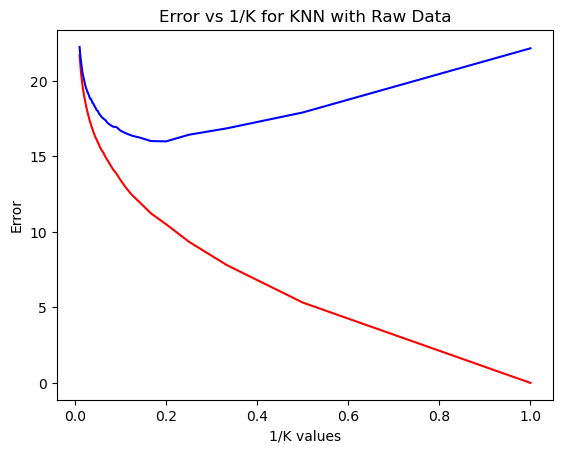

In [22]:
# K-Nearest Neighbors Regression using raw data
predictor_cols = df.drop('PE', axis=1)
target = np.array(df['PE'])
train_mse_dict = {}
test_mse_dict = {}
train_X, test_X, train_Y, test_Y = train_test_split(predictor_cols, target, test_size = 0.3, random_state=50)

for k_value in range(1, 101): 
    inverse_k = 1/k_value
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = k_value)
    knn_regressor.fit(train_X,train_Y)

    train_predictions = knn_regressor.predict(train_X)
    test_predictions = knn_regressor.predict(test_X)
    train_mse_dict[inverse_k] = mean_squared_error(train_Y, train_predictions)
    test_mse_dict[inverse_k] = mean_squared_error(test_Y, test_predictions)

# Plotting training and testing errors against 1/k
plt.plot(train_mse_dict.keys(),train_mse_dict.values(), color='red',label='Training Error')
plt.plot(test_mse_dict.keys(),test_mse_dict.values(), color='blue',label='Testing Error')
plt.xlabel('1/K values')
plt.ylabel('Error')
plt.title('Error vs 1/K for KNN with Raw Data')
plt.show()

In [23]:

# Finding the best k value
min_error = min(test_mse_dict.values())
optimal_k_inverse = list(test_mse_dict.keys())[list(test_mse_dict.values()).index(min_error)]
print("Optimal K for raw data ",1/optimal_k_inverse, " with MSE ", min_error)
allError = {}
allError['KNN regression with raw data'] = min_error


Optimal K for raw data  5.0  with MSE  16.00153278160919


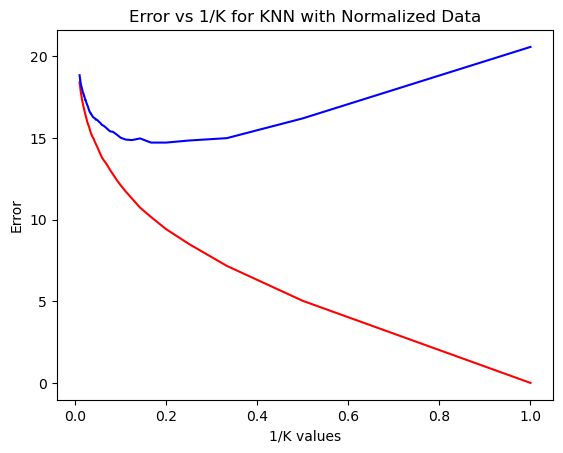

In [24]:
# K-Nearest Neighbors Regression using normalized data
predictor_cols = df.drop('PE', axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_features = scaler.fit_transform(predictor_cols)

train_mse_dict = {}
test_mse_dict = {}
train_X, test_X, train_Y, test_Y = train_test_split(scaled_features, target, test_size = 0.3, random_state=50)

for k_value in range(1, 101): 
    inverse_k = 1/k_value
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = k_value)
    knn_regressor.fit(train_X,train_Y)

    train_predictions = knn_regressor.predict(train_X)
    test_predictions = knn_regressor.predict(test_X)
    train_mse_dict[inverse_k] = mean_squared_error(train_Y, train_predictions)
    test_mse_dict[inverse_k] = mean_squared_error(test_Y, test_predictions)

# Plotting training and testing errors against 1/k
plt.plot(train_mse_dict.keys(),train_mse_dict.values(), color='red',label='Training Error')
plt.plot(test_mse_dict.keys(),test_mse_dict.values(), color='blue',label='Testing Error')
plt.xlabel('1/K values')
plt.ylabel('Error')
plt.title('Error vs 1/K for KNN with Normalized Data')
plt.show()


In [25]:
# Finding the best k value
min_error = min(test_mse_dict.values())
optimal_k_inverse = list(test_mse_dict.keys())[list(test_mse_dict.values()).index(min_error)]
print("Optimal K for normalized data ",1/optimal_k_inverse , " with MSE ", min_error)
allError['KNN regression with normalized data'] = min_error


Optimal K for normalized data  5.0  with MSE  14.722063764541968


### (j ) Compare KNN and Linear

In [26]:
"""### 1(j) Analyze and contrast the KNN Regression outcomes with the linear regression model that has the minimum test error."""

print("Comparing test errors of KNN regression and the best linear regression model:")
print("--------------------------------------------------")


for key in error_metrics:
    print(f"{key} has a test error of {error_metrics[key]}")
for key in allError:
    print(f"{key} has a test error of {allError[key]}")

print("--------------------------------------------------")

print("The KNN regression models, especially the one with normalized data, outperform the linear regression models in terms of test error. \nThis indicates that the non-linearity and complex relationships present in the data are better captured by the KNN algorithm, which considers the proximity of data points.")

Comparing test errors of KNN regression and the best linear regression model:
--------------------------------------------------
Simple linear regression has a test error of 21.342799505033835
Linear regression with interactions has a test error of 17.169141124019113
Linear regression with significant interactions has a test error of 17.206734243364963
KNN regression with raw data has a test error of 16.00153278160919
KNN regression with normalized data has a test error of 14.722063764541968
--------------------------------------------------
The KNN regression models, especially the one with normalized data, outperform the linear regression models in terms of test error. 
This indicates that the non-linearity and complex relationships present in the data are better captured by the KNN algorithm, which considers the proximity of data points.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

In [27]:
print("Better: A flexible statistical method will perform better. With a large sample size (n), the risk of overfitting is reduced, allowing more complex models to be employed without detriment.")

Better: A flexible statistical method will perform better. With a large sample size (n), the risk of overfitting is reduced, allowing more complex models to be employed without detriment.


### (b) The number of predictors p is extremely large, and the number of observations n is small.

In [28]:
print("Worse: A flexible statistical method would be less effective. As discussed above, flexible methods perform better with larger sample sizes. Therefore, with a smaller number of observations, a flexible method would be more prone to overfitting compared to an inflexible method.")

Worse: A flexible statistical method would be less effective. As discussed above, flexible methods perform better with larger sample sizes. Therefore, with a smaller number of observations, a flexible method would be more prone to overfitting compared to an inflexible method.


### (c) The relationship between the predictors and response is highly non-linear.

In [29]:
print("Better: A flexible statistical method would be a better fit as it allows for more degrees of freedom. This makes it more capable of capturing complex, non-linear relationships between predictors and response.")

Better: A flexible statistical method would be a better fit as it allows for more degrees of freedom. This makes it more capable of capturing complex, non-linear relationships between predictors and response.


### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

In [30]:
print("Worse: A flexible statistical method would perform worse than an inflexible method. In the presence of high variance in error terms, a flexible method might overfit to the noise in the error, which results in an increased variance of the estimated outputs.")

Worse: A flexible statistical method would perform worse than an inflexible method. In the presence of high variance in error terms, a flexible method might overfit to the noise in the error, which results in an increased variance of the estimated outputs.


## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.


Using Euclidean distance formula: 
d(p, q) = $\sqrt{\sum_{i=1}^{N} (X_{i} - Y_{i})^2}$

1. Observation 1: $\sqrt{(0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2}$ = 3, Color: Red
2. Observation 2: $\sqrt{(2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2}$ = 2, Color: Red
3. Observation 3: $\sqrt{(0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2}$ = $\sqrt{10}$, Color: Red
4. Observation 4: $\sqrt{(0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2}$ = $\sqrt{5}$, Color: Green
5. Observation 5: $\sqrt{(-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2}$ = $\sqrt{2}$, Color: Green
6. Observation 6: $\sqrt{(1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2}$ = $\sqrt{3}$, Color: Red

|Observation Number | X1 | X2 | X3 | Euclidean Distance | Color |
|-------------------|----|----|----|---------------------|-------|
|1                  |0   |3   |0   |3                    |Red    |
|2                  |2   |0   |0   |2                    |Red    |
|3                  |0   |1   |3   |$\sqrt{10}$ = 3.2       |Red    |
|4                  |0   |1   |2   |$\sqrt{5}$ = 2.2        |Green  |
|5                  |-1  |0   |1   |$\sqrt{2}$ = 1.4        |Green  |
|6                  |1   |1   |1   |$\sqrt{3}$ = 1.7        |Red    |

### (b) What is our prediction with K = 1? Why?

In [31]:
print("With K=1, the nearest neighbor is observation #5 as the Euclidean distance is 1.4 (least). Hence, our prediction is Green.")

With K=1, the nearest neighbor is observation #5 as the Euclidean distance is 1.4 (least). Hence, our prediction is Green.


### (c) What is our prediction with K = 3? Why?

In [32]:
print("With K=3, the nearest neighbors are observations #5, #6, and #2, which are Green, Red, and Red, respectively. Since the majority color is Red, our prediction is Red.")

With K=3, the nearest neighbors are observations #5, #6, and #2, which are Green, Red, and Red, respectively. Since the majority color is Red, our prediction is Red.


### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

In [33]:
print("We would expect a small value for k. A small k would make the model more flexible to accommodate the non-linear boundary. In contrast, a large k would result in a more linear decision boundary as it considers more points for each prediction.")

We would expect a small value for k. A small k would make the model more flexible to accommodate the non-linear boundary. In contrast, a large k would result in a more linear decision boundary as it considers more points for each prediction.
